In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle
import os

In [5]:
# Load dataset
df = pd.read_csv("C:/Users/user/Telco-Customer-Churn.csv")


In [9]:
# Display basic information
print(df.head())
print(df.shape)
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# Display the data types of the columns
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Convert 'TotalCharges' to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Drop rows with missing values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)


In [8]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Print categorical columns
print("Categorical Columns:")
print(categorical_cols)

# Print non-categorical columns
print("\nNon-Categorical Columns:")
print(non_categorical_cols)

Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Non-Categorical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [10]:
# Drop the 'customerID' column
df.drop(columns=['customerID'], inplace=True)

# Verify that the column has been dropped
print(df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the encoded DataFrame
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [12]:
# Select relevant columns for correlation
columns_to_check = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod',
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_check]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Display correlations with the target variable 'Churn', excluding 'Churn' itself
churn_correlation = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
print("Correlation with Churn (excluding 'Churn' column):")
print(churn_correlation)


Correlation with Churn (excluding 'Churn' column):
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


In [13]:
correlation_df = pd.Series(churn_correlation)

# Set a lower threshold
threshold = 0.1

# Select features with high absolute correlation
highly_correlated_features = correlation_df[(correlation_df.abs() >= threshold) & (correlation_df.index != 'Churn')]
print(highly_correlated_features)


MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


In [14]:
# Find not relevant features using list comprehension
not_relevant_features = [col for col in df.columns if col not in highly_correlated_features and col != 'Churn']

# Print not relevant features
print("Not Relevant Features:")
print(not_relevant_features)

Not Relevant Features:
['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']


In [15]:
# Drop non-relevant features
df_reduced = df.drop(columns=not_relevant_features)

# Print the new dataset
print("New Dataset with Relevant Features:")
print(df_reduced.head())  # Display the first few rows of the new dataset


New Dataset with Relevant Features:
   SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0       1               0             2   
1              0        0           0      34               2             0   
2              0        0           0       2               2             2   
3              0        0           0      45               2             0   
4              0        0           0       2               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyChar

In [16]:
# Features and target
X = df_reduced.drop('Churn', axis=1)
y = df_reduced['Churn']

In [17]:
#The dataset may be imbalanced, meaning there are more "Not Churn" customers than "Churn." This can cause the model to favor predicting the majority class
print(df_reduced['Churn'].value_counts())


Churn
0    5163
1    1869
Name: count, dtype: int64


In [18]:
# Handle class imbalance with SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Scale numerical features
scaler = StandardScaler()
X_train[['tenure', 'TotalCharges','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'TotalCharges','MonthlyCharges']])
X_test[['tenure', 'TotalCharges','MonthlyCharges']] = scaler.transform(X_test[['tenure', 'TotalCharges','MonthlyCharges']])

In [21]:
# Logistic Regression model with class weighting for imbalance
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [22]:
# Predictions
y_pred = logistic_regression.predict(X_test)

In [23]:
# Accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of Logistic Regression model: 0.7928363988383349
Confusion Matrix:
[[781 256]
 [172 857]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1037
           1       0.77      0.83      0.80      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [24]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy and metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest model: {accuracy_rf}")
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Accuracy of Random Forest model: 0.8305905130687319
Confusion Matrix for Random Forest:
[[868 169]
 [181 848]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1037
           1       0.83      0.82      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [25]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Accuracy and metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN model: {accuracy_knn}")
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Accuracy of KNN model: 0.7909002904162633
Confusion Matrix for KNN:
[[807 230]
 [202 827]]

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1037
           1       0.78      0.80      0.79      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [26]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy and metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM model: {accuracy_svm}")
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Accuracy of SVM model: 0.813649564375605
Confusion Matrix for SVM:
[[838 199]
 [186 843]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1037
           1       0.81      0.82      0.81      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [27]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy and metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree model: {accuracy_dt}")
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Accuracy of Decision Tree model: 0.7749273959341723
Confusion Matrix for Decision Tree:
[[804 233]
 [232 797]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1037
           1       0.77      0.77      0.77      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [69]:

os.makedirs('res', exist_ok=True)

# Save Random Forest model
pickle.dump(rf_model, open('res/random_forest_model.pkl', 'wb'))


In [70]:
import pandas as pd
import pickle

# Load Random Forest model
rf_model = pickle.load(open('res/random_forest_model.pkl', 'rb'))

def predictive_rf(SeniorCitizen, Partner, Dependents, tenure, 
                  OnlineSecurity, OnlineBackup, DeviceProtection, 
                  TechSupport, Contract, PaperlessBilling, 
                  PaymentMethod, MonthlyCharges, TotalCharges):
    
    # Manually encode the categorical features
    data = {
        'SeniorCitizen': [SeniorCitizen],  # 0 or 1
        'Partner': [1 if Partner == 'Yes' else 0],  # Yes=1, No=0
        'Dependents': [1 if Dependents == 'Yes' else 0],  # Yes=1, No=0
        'tenure': [tenure],  # Numerical
        'OnlineSecurity': [1 if OnlineSecurity == 'Yes' else (0 if OnlineSecurity == 'No' else -1)],  # Yes=1, No=0, No internet service=-1
        'OnlineBackup': [1 if OnlineBackup == 'Yes' else (0 if OnlineBackup == 'No' else -1)],  # Yes=1, No=0, No internet service=-1
        'DeviceProtection': [1 if DeviceProtection == 'Yes' else (0 if DeviceProtection == 'No' else -1)],  # Yes=1, No=0, No internet service=-1
        'TechSupport': [1 if TechSupport == 'Yes' else (0 if TechSupport == 'No' else -1)],  # Yes=1, No=0, No internet service=-1
        'Contract': [0 if Contract == 'Month-to-month' else (1 if Contract == 'One year' else 2)],  # Month-to-month=0, One year=1, Two year=2
        'PaperlessBilling': [1 if PaperlessBilling == 'Yes' else 0],  # Yes=1, No=0
        'PaymentMethod': [0 if PaymentMethod == 'Electronic check' else 
                         (1 if PaymentMethod == 'Mailed check' else 
                          (2 if PaymentMethod == 'Bank transfer (automatic)' else 
                           (3 if PaymentMethod == 'Credit card (automatic)' else 4)))],  # 0-4 based on method
        'MonthlyCharges': [MonthlyCharges],  # Numerical
        'TotalCharges': [TotalCharges]  # Numerical
    }
    
    df1 = pd.DataFrame(data)

    # Scale numerical features
    df1[['tenure', 'TotalCharges', 'MonthlyCharges']] = scaler.transform(df1[['tenure', 'TotalCharges', 'MonthlyCharges']])

    # Predict using the trained Random Forest model
    result = rf_model.predict(df1)
    return result[0]


In [72]:

# Example prediction (modify this as needed to provide the required inputs)
prediction = predictive_rf(
    SeniorCitizen=0, 
    Partner='No', 
    Dependents='No', 
    tenure=34, 
  OnlineSecurity='Yes',
 OnlineBackup='No',
 DeviceProtection='Yes', 
TechSupport='No', 
    Contract='One year', 
  PaperlessBilling='No' ,
PaymentMethod='Mailed check',
 MonthlyCharges=56.95, 
    TotalCharges=1889.5
   
    
   
    
    
  
  
)

print("Prediction:", "Churn" if prediction == 1 else "No Churn")


Prediction: Churn


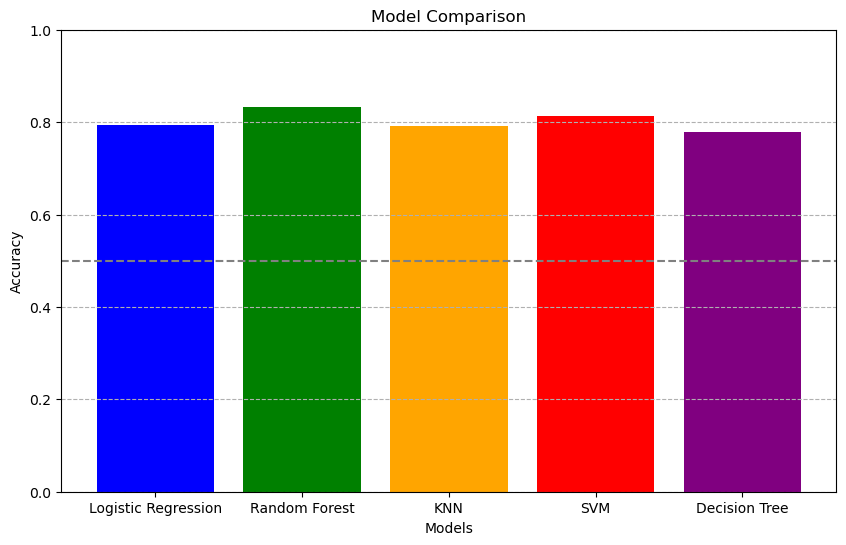

In [31]:
import matplotlib.pyplot as plt 
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.axhline(y=0.5, color='gray', linestyle='--') 
plt.grid(axis='y', linestyle='--')
plt.show()

In [76]:

# Example prediction (modify this as needed to provide the required inputs)
prediction = predictive_rf(
    SeniorCitizen=0, 
    Partner='No', 
    Dependents='No', 
    tenure=45, 
    OnlineSecurity='Yes',
    OnlineBackup='No',
    DeviceProtection='Yes', 
    TechSupport='Yes', 
    Contract='One year', 
    PaperlessBilling='No' ,
    PaymentMethod='Bank transfer (automatic)',
    MonthlyCharges=42.3, 
    TotalCharges=1840.75
)

print("Prediction:", "Churn" if prediction == 1 else "No Churn")



Prediction: No Churn


In [78]:

# Example prediction (modify this as needed to provide the required inputs)
prediction = predictive_rf(
    SeniorCitizen=0, 
    Partner='No', 
    Dependents='No', 
    tenure=2, 
    OnlineSecurity='Yes',
    OnlineBackup='Yes',
    DeviceProtection='No', 
    TechSupport='No', 
    Contract='Month-to-month', 
    PaperlessBilling='Yes' ,
    PaymentMethod='Mailed check',
    MonthlyCharges=53.85, 
    TotalCharges=108.15
)

print("Prediction:", "Churn" if prediction == 1 else "No Churn")

Prediction: Churn


In [80]:
# Logistic Regression
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# KNN
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Create a DataFrame to display model accuracies
accuracy_values = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_dt]
}

accuracy_df = pd.DataFrame(accuracy_values)

# Display the table
print(accuracy_df)


                 Model  Accuracy
0  Logistic Regression  0.792836
1        Random Forest  0.830591
2                  KNN  0.790900
3                  SVM  0.813650
4        Decision Tree  0.774927
